In [1]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_cir import JumpCIR
from models.cir import CIR
from evaluators.monte_carlo import MonteCarlo

In [2]:
model_params = {
    "kappa": 0.5,
    "mu_r": 0.06,
    "sigma": 0.02,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
jump_cir = JumpCIR(model_params)
mc_jump_cir = MonteCarlo(jump_cir)

In [4]:
T = np.arange(1, 21)
prices_class = np.empty(len(T))
std_class = np.empty(len(T))
prices_anti = np.empty(len(T))
std_anti = np.empty(len(T))
prices_cv = np.empty(len(T))
std_cv = np.empty(len(T))
prices_cv_anti = np.empty(len(T))
std_cv_anti = np.empty(len(T))

In [5]:
for t in T:
    prices_class[t-1], std_class[t-1] = mc_jump_cir._simulate_paths(m=104, r0=0.04, n=100, T=t)
    prices_anti[t-1], std_anti[t-1] = mc_jump_cir._simulate_paths_anti(m=104, r0=0.04, n=100, T=t)
    prices_cv[t-1], std_cv[t-1] = mc_jump_cir._simulate_paths_cv(m=104, r0=0.04, n=100, T=t, exact_model_class=CIR)
    prices_cv_anti[t-1], std_cv_anti[t-1] = mc_jump_cir._simulate_paths_cv_anti(m=104, r0=0.04, n=100, T=t, exact_model_class=CIR)

<AxesSubplot:xlabel='Year'>

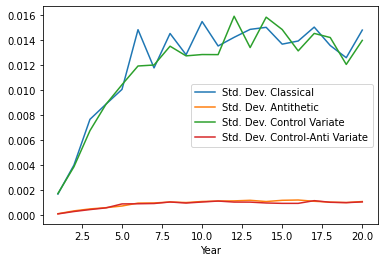

In [6]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti), pd.Series(std_cv), pd.Series(std_cv_anti)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic", "Std. Dev. Control Variate", "Std. Dev. Control-Anti Variate"]
std_df.plot()